In [135]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from pathlib import Path
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [136]:
train_data_URL  = "https://raw.githubusercontent.com/aalfiler/project_2/main/Data/cs-training.csv"
df = pd.read_csv(train_data_URL)
test_data_URL = "https://raw.githubusercontent.com/aalfiler/project_2/main/Data/cs-test.csv"
testdf  =pd.read_csv(test_data_URL)
df.shape

(150000, 12)

In [137]:

testdf.shape


(101503, 12)

In [138]:
# just in case we left the number of dependents as the overall mean df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].mean()) 

In [139]:
df = df.dropna()
testdf = testdf.drop('SeriousDlqin2yrs', axis=1).dropna()

In [140]:
shapex = df.shape
shapey = testdf.shape
print(shapex, shapey)

(120269, 12) (81400, 11)


In [141]:
testdf.isnull().sum()

Unnamed: 0                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [142]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,75026.012514,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,43286.029117,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37678.000000,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74969.000000,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112494.000000,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,150000.000000,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


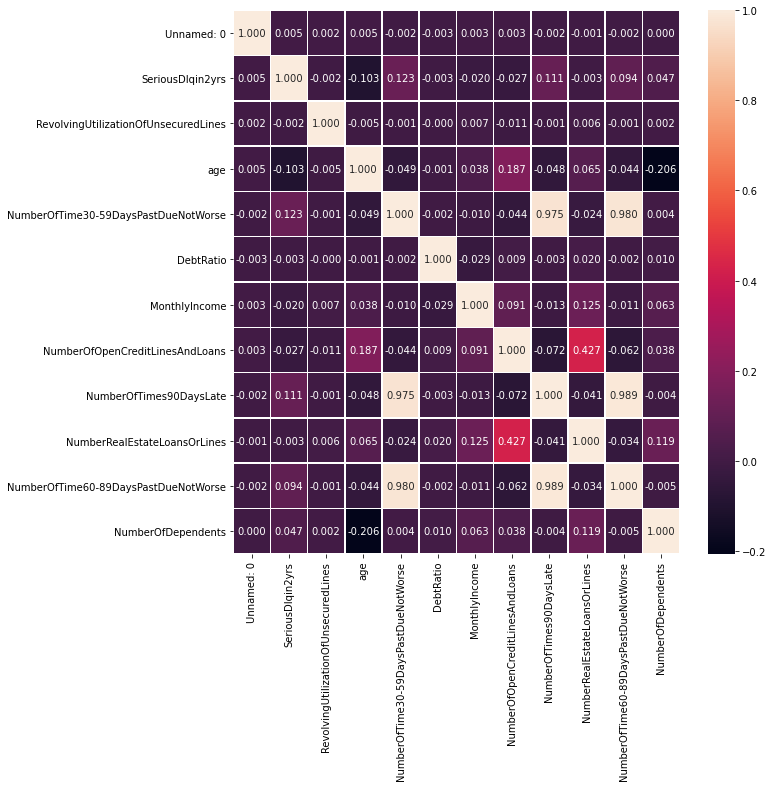

In [143]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)
plt.show()

In [144]:
df['Id'] = df['Unnamed: 0']
df.drop('Unnamed: 0', axis=1, inplace=True)
testdf['Id'] = testdf['Unnamed: 0']
testdf.drop('Unnamed: 0', axis=1, inplace=True)
Id = testdf['Id']
df.drop('Id', axis=1, inplace=True)
testdf.drop('Id', axis=1, inplace=True)

In [145]:
X = df.drop('SeriousDlqin2yrs',axis=1)
y = df['SeriousDlqin2yrs']

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [147]:
X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size=0.3, random_state=226)

In [148]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
RF = RandomForestClassifier()

In [149]:
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 100, 150],
           "max_depth" : [2,3,5,7,9],
           "min_samples_leaf" : [2, 4, 6, 8]}

In [150]:
RF_random = RandomizedSearchCV(RF, param_distributions=param_grid, cv=5)

In [151]:
RF_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 5, 7, 9],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'n_estimators': [9, 18, 27, 36, 100,
                                                         150]})

In [152]:
best_est_RF = RF_random.best_estimator_

In [153]:
y_pred = best_est_RF.predict_proba(X_train)
y_pred = y_pred[:,1]

In [154]:
print('Accuracy of classifier on training set: {:.2f}'.format(RF_random.score(X_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(RF_random.score(X_test, y_test) * 100))

Accuracy of classifier on training set: 93.68
Accuracy of classifier on test set: 93.40


In [155]:
y_pred = best_est_RF.predict_proba(X_train)
y_pred = y_pred[:,1]

In [156]:
from sklearn.metrics import roc_curve, auc

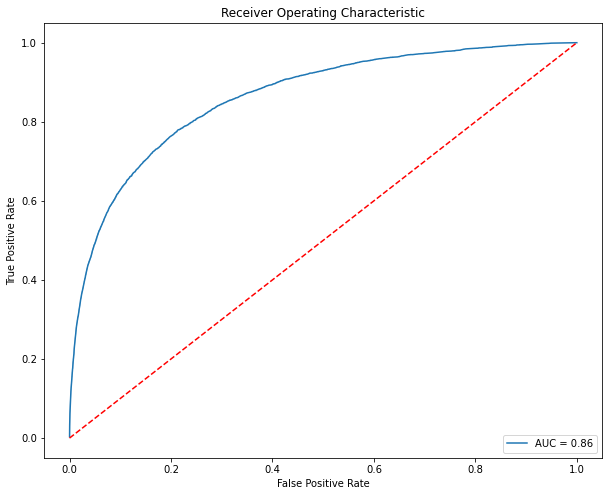

In [157]:
fpr,tpr,_ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [158]:
testdf.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [159]:
# testdf.drop('SeriousDlqin2yrs', axis=1, inplace=True)
y_pred=best_est_RF.predict_proba(testdf)
y_pred= y_pred[:,1]

In [160]:
# df_s["Probability"]=y_pred
# df_s.head()

In [161]:
# XGB = XGBClassifier(n_jobs=-1) 
 
# param_grid = {
  #                'n_estimators' :[100,150,200,250,300],
  #                "learning_rate" : [0.001,0.01,0.0001,0.05, 0.10 ],
  #                "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
  #                "colsample_bytree" : [0.5,0.7],
  #                'max_depth': [3,4,6,8]
  #            }

In [114]:
#XGB_random = RandomizedSearchCV(XGB, param_distributions=param_grid, cv=5)

In [134]:
# XGB_random.fit(X_train,y_train)

In [163]:
# best_est_XGB = XGB_random.best_estimator_
model = XGBClassifier()
model.fit(X_train, y_train)

[21:36:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
print('Accuracy of classifier on training set: {:.2f}'.format(model.score(X_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(model.score(X_test, y_test) * 100))

Accuracy of classifier on training set: 94.95
Accuracy of classifier on test set: 93.27


In [165]:
y_pred=model.predict_proba(testdf)
y_pred= y_pred[:,1]

In [166]:
y_pred

array([0.08346088, 0.07772753, 0.01692257, ..., 0.02866954, 0.57482773,
       0.05585474], dtype=float32)

In [167]:
predictions = pd.DataFrame(data=y_pred, index=Id)

In [168]:
predictions.head(15)

,0
Id,
1,0.083461
2,0.077728
3,0.016923
4,0.121830
5,0.164537
6,0.019795
7,0.039892
8,0.026989
10,0.313952


In [169]:
import pickle

In [170]:
pickle.dump(model, open("xgb-creditshit.pickle.dat", "wb"))